In [ ]:
image = Image.open("test.jpg").convert("RGB")


In [3]:
from transformers import AutoImageProcessor, DeformableDetrForObjectDetection
import torch
from PIL import Image
import requests

image = Image.open("test.jpg").convert("RGB")

processor = AutoImageProcessor.from_pretrained("facebook/deformable-detr-detic")
model = DeformableDetrForObjectDetection.from_pretrained("facebook/deformable-detr-detic")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.7
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.1)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )


Detected toy with confidence 0.552 at location [811.77, 829.43, 914.55, 949.73]
Detected cube with confidence 0.519 at location [811.32, 829.4, 914.3, 950.09]
Detected Lego with confidence 0.503 at location [781.11, 1092.23, 886.47, 1199.17]
Detected eraser with confidence 0.387 at location [781.11, 1092.23, 886.47, 1199.17]
Detected cube with confidence 0.385 at location [781.11, 1092.23, 886.47, 1199.17]
Detected cigarette with confidence 0.376 at location [149.69, 963.92, 184.08, 976.67]
Detected magnet with confidence 0.375 at location [811.32, 829.4, 914.3, 950.09]
Detected Lego with confidence 0.373 at location [811.32, 829.4, 914.3, 950.09]
Detected Lego with confidence 0.36 at location [780.94, 1091.95, 887.12, 1198.36]
Detected toy with confidence 0.347 at location [780.94, 1091.95, 887.12, 1198.36]
Detected tape_(sticky_cloth_or_paper) with confidence 0.343 at location [811.32, 829.4, 914.3, 950.09]
Detected shampoo with confidence 0.326 at location [811.32, 829.4, 914.3, 950

In [7]:
results[0]

{'scores': tensor([0.8214, 0.5817, 0.5513]),
 'labels': ['a yellow block', 'a yellow block', 'a yellow block'],
 'boxes': tensor([[ 808.0611,  826.9955,  916.7809,  950.7960],
         [ 779.8358, 1091.6400,  887.4161, 1199.1527],
         [ 754.4226, 1334.4436,  864.0273, 1451.5764]])}

In [2]:
import sys
sys.path.append("../")
from magpie import realsense_wrapper as real
import numpy as np

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
rsc = real.RealSense()
rsc.initConnection()

In [6]:
p, rgbd_image = rsc.getPCD()
# p, rgbd_image = rsc.getPCD(adjust_extrinsics=True)
image = np.array(rgbd_image.color)
img = Image.fromarray(image)
texts = [["a photo of a yellow block"]]
inputs = processor(text=texts, images=image, return_tensors="pt")
outputs = model(**inputs)


In [11]:
W = img.size[0]
H = img.size[1]
target_sizes = torch.Tensor([[W, W]])

TypeError: 'int' object is not subscriptable

In [1]:
import sys
sys.path.append("../")
# from magpie.perception.label_owlvit import LabelOWLViT
from magpie.perception.label_dino import LabelDINO
# path = "google/owlvit-base-patch32"
# label_vit = LabelOWLViT(pth=path, topk=3)
label_dino = LabelDINO(topk=3)

2024-09-04 12:44:36.212829: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 12:44:36.212869: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 12:44:36.214086: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-04 12:44:36.221344: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-04 12:44:37.235400: W tensorflow/compiler/tf2

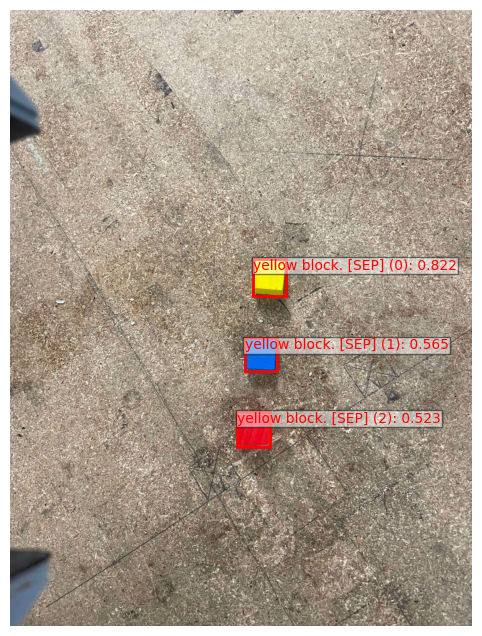

In [2]:
import numpy as np
from PIL import Image
image = Image.open("test.jpg").convert("RGB")
label_dino.set_threshold(0.001)
image = np.array(image)
queries = ["yellow block"]
abbrevq = ["yellow block"]
bboxes, uboxes = label_dino.label(image, queries, abbrevq, plot=True, topk=True)


In [5]:
label_dino.sorted_labeled_boxes_coords

[(array([0.52603835, 0.4037873 , 0.5968413 , 0.46426308], dtype=float32),
  'yellow block. [SEP]'),
 (array([0.5075933 , 0.53296673, 0.57772267, 0.58549833], dtype=float32),
  'yellow block. [SEP]'),
 (array([0.4911389 , 0.65162235, 0.56241924, 0.70869464], dtype=float32),
  'yellow block. [SEP]'),
 (array([0.00322843, 0.00224486, 0.99668026, 0.9967452 ], dtype=float32),
  'yellow block. [SEP]'),
 (array([0.00051929, 0.10551195, 0.0673915 , 0.21580534], dtype=float32),
  'yellow block. [SEP]'),
 (array([0.52612185, 0.40370613, 0.59658706, 0.46419102], dtype=float32),
  'yellow block. [SEP]'),
 (array([0.4910006, 0.4015599, 0.5979902, 0.7090737], dtype=float32),
  'yellow block. [SEP]'),
 (array([0.526892  , 0.40451688, 0.56846493, 0.4587394 ], dtype=float32),
  'yellow block. [SEP]'),
 (array([0.5290877 , 0.4044607 , 0.59865683, 0.4431959 ], dtype=float32),
  'yellow block. [SEP]'),
 (array([0.528233  , 0.40358078, 0.5986859 , 0.4302724 ], dtype=float32),
  'yellow block. [SEP]'),
 (ar

In [5]:
label_vit.sorted_labeled_boxes_coords[:3]

[(array([808.78564, 828.45197, 913.578  , 952.09625], dtype=float32), 0),
 (array([ 781.1911, 1095.1906,  886.8322, 1203.2418], dtype=float32), 0),
 (array([ 755.9107 , 1337.5481 ,  862.88544, 1452.7532 ], dtype=float32), 0)]

In [6]:
import sys
sys.path.append("../")
from magpie.perception.label_owlvit import LabelOWLViT
path = "google/owlvit-base-patch32"
label_vit1 = LabelOWLViT(pth=path, topk=3)

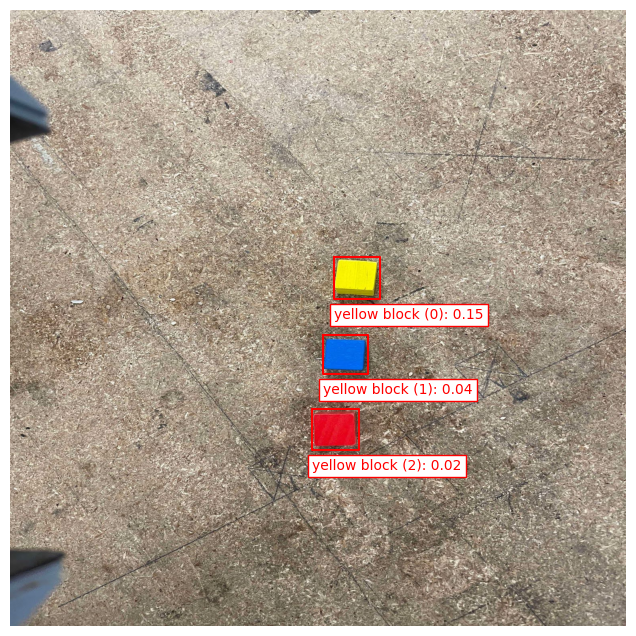

In [7]:
import numpy as np
from PIL import Image
image = Image.open("test.jpg").convert("RGB")
label_vit.set_threshold(0.001)
image = np.array(image)
queries = ["a photo of a yellow block"]
abbrevq = ["yellow block"]
bboxes, uboxes = label_vit1.label(image, queries, abbrevq, plot=True, topk=True)


In [8]:
label_vit1.sorted_labeled_boxes_coords[:3]

[(array([808.1278038 , 821.32295227, 922.95166397, 960.20353699]), 0),
 (array([ 781.16195869, 1081.80727768,  893.65524101, 1209.71176529]), 0),
 (array([ 753.87039185, 1327.1173172 ,  869.4994812 , 1461.44908905]), 0)]